### **Modules Importation**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from nba_api.stats.static import players

from nba_api.stats.static import teams
from nba_api.stats.endpoints import teamgamelog

### ***CONSTANT***

In [2]:
PlayerNameSelected = "Kawhi Leonard"
TeamNameSelected = "Los Angeles Clippers"
SeasonSelected = "2019"

In [3]:
active_players_df = pd.DataFrame(players.get_players())

In [4]:
active_players_df.columns

Index(['id', 'full_name', 'first_name', 'last_name', 'is_active'], dtype='object')

##### **Find the id of a player**

In [5]:
player_id = active_players_df[active_players_df.full_name == PlayerNameSelected].iloc[0, 0]
player_id

202695

##### _**Gamelog of a player**_


In [6]:
import urllib3, socket
from urllib3.connection import HTTPConnection
    
HTTPConnection.default_socket_options = ( 
    HTTPConnection.default_socket_options + [
    (socket.SOL_SOCKET, socket.SO_SNDBUF, 2000000), #1MB in byte
    (socket.SOL_SOCKET, socket.SO_RCVBUF, 2000000)
])

In [7]:
from nba_api.stats.endpoints import playergamelog

In [8]:
player_sheet = playergamelog.PlayerGameLog(player_id, season=SeasonSelected)

In [9]:
player_gamelog_df = player_sheet.get_data_frames()

In [10]:
#Select the ith dataframe 
player_gamelog_select_df = player_gamelog_df[0]

In [11]:
player_gamelog_select_df.describe()

,Player_ID,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,...,DREB,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,VIDEO_AVAILABLE
count,57.0,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,...,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.0
mean,202695.0,32.491228,9.333333,19.877193,0.471439,2.157895,5.701754,0.381123,6.245614,7.052632,...,6.105263,7.052632,4.912281,1.807018,0.578947,2.614035,1.982456,27.070175,8.385965,1.0
std,0.0,4.942971,2.714599,4.480394,0.108615,1.306433,2.187341,0.196284,3.241917,3.450782,...,2.575185,3.055563,2.269996,1.109031,0.777987,1.887500,1.356087,6.966398,14.702714,0.0
min,202695.0,21.000000,2.000000,11.000000,0.182000,0.000000,1.000000,0.000000,0.000000,0.000000,...,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,-23.000000,1.0
25%,202695.0,28.000000,8.000000,16.000000,0.409000,1.000000,4.000000,0.250000,4.000000,5.000000,...,4.000000,5.000000,3.000000,1.000000,0.000000,1.000000,1.000000,24.000000,-2.000000,1.0
50%,202695.0,33.000000,9.000000,20.000000,0.476000,2.000000,6.000000,0.400000,6.000000,7.000000,...,6.000000,6.000000,5.000000,2.000000,0.000000,2.000000,2.000000,27.000000,12.000000,1.0
75%,202695.0,36.000000,11.000000,23.000000,0.550000,3.000000,7.000000,0.500000,8.000000,9.000000,...,8.000000,9.000000,6.000000,2.000000,1.000000,3.000000,3.000000,31.000000,16.000000,1.0
max,202695.0,46.000000,15.000000,32.000000,0.688000,6.000000,10.000000,1.000000,19.000000,19.000000,...,12.000000,14.000000,10.000000,5.000000,3.000000,9.000000,5.000000,43.000000,39.000000,1.0


<AxesSubplot:ylabel='Frequency'>

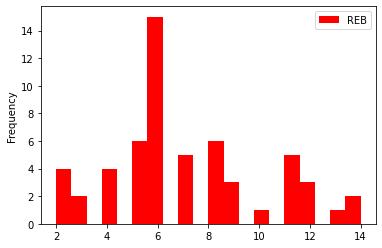

In [12]:
player_gamelog_select_df.plot.hist(y="REB", bins=20, color="red")

##### **Gamelog for a career**

In [13]:
from nba_api.stats.library import parameters

In [14]:
ALL = parameters.SeasonAll().all

In [15]:
player_gmlog_car = playergamelog.PlayerGameLog(player_id, season=ALL)

In [16]:
player_gmlog_car_df = player_gmlog_car.get_data_frames()[0]

In [17]:
player_gmlog_car_df.head(7)

,SEASON_ID,Player_ID,Game_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,FGA,FG_PCT,...,DREB,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,VIDEO_AVAILABLE
0,22020,202695,0022001047,"MAY 13, 2021",LAC @ CHA,W,31,5,9,0.556,...,3,3,9,1,0,3,1,16,15,1
1,22020,202695,0022001034,"MAY 11, 2021",LAC @ TOR,W,30,6,10,0.600,...,7,7,5,2,0,1,2,20,11,1
2,22020,202695,0022001019,"MAY 09, 2021",LAC vs. NYK,L,36,9,26,0.346,...,4,4,3,1,0,1,0,29,-6,1
3,22020,202695,0022001002,"MAY 06, 2021",LAC vs. LAL,W,30,4,9,0.444,...,7,8,6,0,1,5,2,15,21,1
4,22020,202695,0022000989,"MAY 04, 2021",LAC vs. TOR,W,33,3,6,0.500,...,3,3,5,0,0,3,0,13,20,1
5,22020,202695,0022000966,"MAY 01, 2021",LAC vs. DEN,L,30,7,12,0.583,...,3,5,6,0,0,1,1,16,-2,1
6,22020,202695,0022000867,"APR 18, 2021",LAC vs. MIN,W,23,6,11,0.545,...,11,11,8,0,1,3,1,15,30,1


#### Creation of a OPP column (the opponent) and the W (win)

In [18]:
opponent = [o[-3:] for o in player_gmlog_car_df["MATCHUP"]]
player_gmlog_car_df.insert(5, "OPP", opponent, False)

player_gmlog_car_df['WIN'] = player_gmlog_car_df['WL'].apply(lambda x: 1 if x=="W"  else 0)

In [19]:
win_pct = player_gmlog_car_df.WIN.sum() / player_gmlog_car_df.shape[0]
print("The winning percentage of **{}** is: {:.2f}.".format(PlayerNameSelected, win_pct))

The winning percentage of **Kawhi Leonard** is: 0.74.


In [20]:
player_gmlog_car_df

,SEASON_ID,Player_ID,Game_ID,GAME_DATE,MATCHUP,OPP,WL,MIN,FGM,FGA,...,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,VIDEO_AVAILABLE,WIN
0,22020,202695,0022001047,"MAY 13, 2021",LAC @ CHA,CHA,W,31,5,9,...,3,9,1,0,3,1,16,15,1,1
1,22020,202695,0022001034,"MAY 11, 2021",LAC @ TOR,TOR,W,30,6,10,...,7,5,2,0,1,2,20,11,1,1
2,22020,202695,0022001019,"MAY 09, 2021",LAC vs. NYK,NYK,L,36,9,26,...,4,3,1,0,1,0,29,-6,1,0
3,22020,202695,0022001002,"MAY 06, 2021",LAC vs. LAL,LAL,W,30,4,9,...,8,6,0,1,5,2,15,21,1,1
4,22020,202695,0022000989,"MAY 04, 2021",LAC vs. TOR,TOR,W,33,3,6,...,3,5,0,0,3,0,13,20,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
571,22011,202695,0021100072,"JAN 02, 2012",SAS @ MIN,MIN,L,17,2,6,...,3,1,2,0,0,1,6,-2,0,0
572,22011,202695,0021100055,"DEC 31, 2011",SAS vs. UTA,UTA,W,15,3,5,...,6,0,1,1,1,2,7,-15,0,1
573,22011,202695,0021100034,"DEC 29, 2011",SAS @ HOU,HOU,L,25,3,7,...,4,0,1,0,0,0,8,1,0,0
574,22011,202695,0021100029,"DEC 28, 2011",SAS vs. LAC,LAC,W,20,1,3,...,8,0,0,0,0,1,2,10,0,1


In [21]:
player_gmlog_car_df1 = player_gmlog_car_df.groupby(['OPP'])
grouped = player_gmlog_car_df1.groups

#### **The DataFrame for each season separately**

In [22]:
print(player_gmlog_car_df.SEASON_ID.describe())

count       576
unique       10
top       22016
freq         74
Name: SEASON_ID, dtype: object


In [23]:
sid_list = [sid for sid in player_gmlog_car_df.SEASON_ID.unique()]
sid_list

['22020',
 '22019',
 '22018',
 '22017',
 '22016',
 '22015',
 '22014',
 '22013',
 '22012',
 '22011']

In [24]:
season = {}
for elem in sid_list:
    season["df_{}".format(elem[-4:])] = player_gmlog_car_df[player_gmlog_car_df["SEASON_ID"]==elem]

In [25]:
season["df_{}".format(SeasonSelected)].describe()

,Player_ID,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,...,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,VIDEO_AVAILABLE,WIN
count,57.0,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,...,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.0,57.000000
mean,202695.0,32.491228,9.333333,19.877193,0.471439,2.157895,5.701754,0.381123,6.245614,7.052632,...,7.052632,4.912281,1.807018,0.578947,2.614035,1.982456,27.070175,8.385965,1.0,0.719298
std,0.0,4.942971,2.714599,4.480394,0.108615,1.306433,2.187341,0.196284,3.241917,3.450782,...,3.055563,2.269996,1.109031,0.777987,1.887500,1.356087,6.966398,14.702714,0.0,0.453336
min,202695.0,21.000000,2.000000,11.000000,0.182000,0.000000,1.000000,0.000000,0.000000,0.000000,...,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,-23.000000,1.0,0.000000
25%,202695.0,28.000000,8.000000,16.000000,0.409000,1.000000,4.000000,0.250000,4.000000,5.000000,...,5.000000,3.000000,1.000000,0.000000,1.000000,1.000000,24.000000,-2.000000,1.0,0.000000
50%,202695.0,33.000000,9.000000,20.000000,0.476000,2.000000,6.000000,0.400000,6.000000,7.000000,...,6.000000,5.000000,2.000000,0.000000,2.000000,2.000000,27.000000,12.000000,1.0,1.000000
75%,202695.0,36.000000,11.000000,23.000000,0.550000,3.000000,7.000000,0.500000,8.000000,9.000000,...,9.000000,6.000000,2.000000,1.000000,3.000000,3.000000,31.000000,16.000000,1.0,1.000000
max,202695.0,46.000000,15.000000,32.000000,0.688000,6.000000,10.000000,1.000000,19.000000,19.000000,...,14.000000,10.000000,5.000000,3.000000,9.000000,5.000000,43.000000,39.000000,1.0,1.000000


Text(0.5, 0, 'FGA')

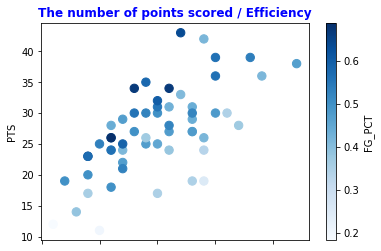

In [26]:
season["df_{}".format(SeasonSelected)].plot.scatter(x="FGA", y="PTS", c="FG_PCT", s=70, cmap="Blues")
plt.xlabel("FGA")
plt.title("The number of points scored / Efficiency", fontsize=12, fontweight="bold", color="blue")
plt.xlabel("FGA", fontweight="bold")

### **TEAMS**

In [27]:
teams_df = pd.DataFrame(teams.get_teams())
teams_df.columns

Index(['id', 'full_name', 'abbreviation', 'nickname', 'city', 'state',
       'year_founded'],
      dtype='object')

##### **Find the id of a team**

In [28]:
team_id = teams_df[teams_df["full_name"]==TeamNameSelected].iloc[0, 0]
team_id

1610612746

### **The foundation year of every NBA Teams**

In [29]:
year_found_df = teams_df[['full_name', 'nickname', 'state', 'year_founded']]
#year_found_df.sort_values('year_founded')

In [30]:
num_year_ex = 2021 - teams_df['year_founded']

In [31]:
teams_df.insert(4, "num_year_ex", num_year_ex, True)

<AxesSubplot:xlabel='nickname', ylabel='year_founded'>

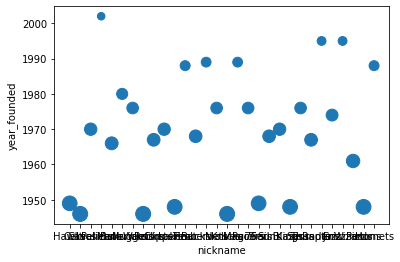

In [32]:
teams_df.plot.scatter(x='nickname', y='year_founded', s=teams_df["num_year_ex"] * 3)

Text(0.5, 0, 'years_founded')

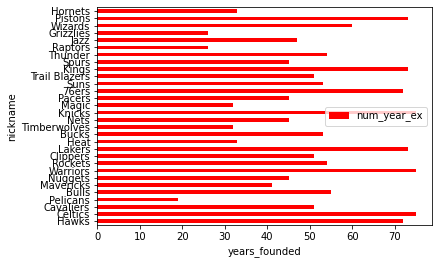

In [33]:
teams_df.plot.barh(x="nickname", y="num_year_ex", color="red")
plt.xlabel("years_founded")